### Spark: Youtube comments analysis
#### Write a Spark program to analyze the text data.

In this notebook, we have a dataset of user comments for youtube videos related to animals or pets. We will attempt to identify cat or dog owners based on these comments, find out the topics important to them, and then identify video creators with the most viewers that are cat or dog owners.

The dataset provided for this coding test are comments for videos related to animals and/or pets. The dataset is 240MB compressed; please download the file using this google drive link:
https://drive.google.com/file/d/1o3DsS3jN_t2Mw3TsV0i7ySRmh9kyYi1a/view?usp=sharing

 The dataset file is comma separated, with a header line defining the field names, listed here:
● creator_name. Name of the YouTube channel creator.
● userid. Integer identifier for the users commenting on the YouTube channels.
● comment. Text of the comments made by the users.

Please use a recent version of PySpark (version 2.2 or higher) to analyze the data. Do not use
any external libraries; just use the native methods from pyspark.sql and pyspark.ml. (Do not
use pyspark.mllib as this has been deprecated.) Keep your code clean and efficient, with
enough documentation so that the grader can easily follow your train of thought. Summarize
the key results from each step. Explain how to execute your code from a command line
interface.

Step 1: Identify Cat And Dog Owners
Find the users who are cat and/or dog owners.

Step 2: Build And Evaluate Classifiers
Build classifiers for the cat and dog owners and measure the performance of the classifiers.

Step 3: Classify All The Users
Apply the cat/dog classifiers to all the users in the dataset. Estimate the fraction of all users
who are cat/dog owners.

Step 4: Extract Insights About Cat And Dog Owners
Find topics important to cat and dog owners.

Step 5: Identify Creators With Cat And Dog Owners In The Audience
Find creators with the most cat and/or dog owners. Find creators with the highest statistically
significant percentages of cat and/or dog owners.

In [3]:
from pyspark.sql.types import BinaryType,BooleanType,StringType,FloatType, ArrayType, DoubleType, IntegerType
from pyspark.sql.functions import when, col, lower, rand
import pyspark.sql.functions as spf
import pandas as pd

In [4]:
#link: https://drive.google.com/file/d/1o3DsS3jN_t2Mw3TsV0i7ySRmh9kyYi1a/view?usp=sharing
#command: wget https://drive.google.com/file/d/1o3DsS3jN_t2Mw3TsV0i7ySRmh9kyYi1a/view?usp=sharing

df = spark.read.csv("/FileStore/tables/animals_comments.csv", inferSchema = True, header = True)
print("how many rows in original data: ", df.count())

# clean data: remove missing creator_name, userid or comment:
to_rmv = df['creator_name'].isNull() | df['userid'].isNull() | df['comment'].isNull()
df_all = df.filter(~to_rmv)

## drop duplicates:
df_all = df_all.dropDuplicates()
df_all = df_all.withColumn('comment', lower(col('comment')))
print("after removing missing data and duplicates, how many left: ", df_all.count())
#df_all.head(10)

In [5]:
df_all.head(10)

Out[ 59 ]: 
[Row(creator_name='WaysideWaifs', userid=89939.0, words=['humans', 'inhuman'], features=DenseVector([0.0999, -0.0575, -0.1467, 0.0656, 0.096, 0.1065, 0.0589, 0.1903, 0.049, -0.2256, 0.2762, 0.0801, -0.0259, 0.0671, -0.1577, -0.1952, -0.3344, -0.0807, 0.0985, -0.2047, -0.0015, 0.0145, -0.0065, 0.0649, 0.1041, 0.002, 0.1582, 0.0871, 0.2604, 0.0671, 0.0603, 0.1104, -0.033, 0.0276, 0.2532, -0.0785, 0.0272, 0.1155, 0.0584, -0.0227, 0.0168, 0.0713, 0.1678, 0.0698, 0.0474, -0.1268, 0.1085, -0.2353, 0.0078, 0.0526, 0.2613, 0.0925, -0.0987, -0.0333, 0.0636, -0.2694, -0.0549, -0.2346, 0.1784, -0.1842, 0.3528, -0.089, -0.0264, 0.0922, 0.041, 0.0278, 0.033, -0.0335, -0.0389, 0.1444, 0.23, 0.0241, -0.0811, 0.0023, -0.0724, -0.0073, -0.03, 0.0249, 0.0778, 0.0086, -0.1494, -0.027, -0.1024, 0.1438, -0.1099, 0.0268, 0.1782, 0.1387, 0.0087, -0.1622, 0.0078, 0.142, 0.1224, 0.1011, 0.1393, -0.0229, 0.1081, 0.0622, 0.0792, 0.0619]), label=0),
 Row(creator_name='meow meow', userid=260511.0, words=['omai', 'wa', 'rejectooooooo'], features=DenseVector([0.065, -0.0892, -0.001, -0.0053, 0.0186, 0.1218, 0.0211, -0.0407, 0.0732, -0.0252, -0.031, -0.0914, 0.0611, -0.0633, 0.1862, 0.0725, -0.0907, -0.1086, 0.058, 0.0045, 0.0365, -0.0656, 0.07, 0.0069, -0.0951, -0.0515, 0.0667, 0.0959, 0.0497, -0.0469, -0.0213, -0.0736, 0.1028, -0.122, -0.0513, -0.063, 0.0811, 0.0346, -0.0794, -0.1321, -0.0212, -0.0438, -0.0798, 0.0404, 0.026, 0.0085, 0.1156, 0.0135, -0.0633, 0.069, 0.0063, 0.1146, -0.0824, 0.0311, -0.043, 0.0492, -0.0175, 0.0273, -0.0098, -0.0492, 0.0136, -0.0888, -0.059, 0.007, -0.0305, 0.0691, -0.0472, 0.0022, -0.0305, -0.0787, -0.0916, -0.079, 0.0046, -0.0097, -0.0181, -0.0332, 0.1579, -0.0426, 0.0293, 0.0385, -0.0015, -0.0536, 0.069, 0.0855, -0.1159, -0.0175, -0.0196, -0.0318, -0.0138, -0.0213, -0.0079, -0.0122, -0.0544, 0.0036, 0.0171, 0.063, 0.0162, -0.0779, 0.0005, 0.0247]), label=0),
 Row(creator_name='Brave Wilderness', userid=420830.0, words=['good', 'job', 'getting', 'trending'], features=DenseVector([0.0433, -0.0774, 0.1526, -0.0172, -0.0896, 0.2079, -0.0822, 0.1124, 0.1063, 0.1528, 0.058, 0.0192, -0.0743, 0.1773, -0.1048, 0.014, -0.1236, -0.0666, -0.0029, 0.2502, 0.024, 0.0672, 0.1498, 0.1482, -0.0016, 0.1739, -0.2395, 0.186, -0.3795, 0.044, 0.14, 0.3579, -0.0674, 0.0199, 0.1746, 0.1459, -0.2034, 0.0525, -0.0857, 0.1528, -0.131, -0.2247, -0.1002, 0.1427, 0.0781, -0.0235, 0.035, -0.2706, 0.3481, 0.0919, 0.1258, 0.0312, -0.0067, 0.1036, -0.1222, -0.0036, 0.0794, -0.4092, 0.2176, 0.0788, -0.0088, 0.1292, -0.0631, -0.1519, 0.107, 0.1682, -0.0173, -0.0421, -0.1164, 0.1109, 0.0937, 0.0251, 0.0585, -0.1876, -0.0658, -0.3824, 0.0213, -0.0252, 0.1458, 0.163, 0.0249, 0.0791, 0.3158, 0.0183, 0.0313, -0.2774, -0.1212, 0.2094, -0.0054, -0.0636, 0.0465, 0.1437, 0.0855, -0.1484, 0.1232, 0.0245, -0.2506, -0.2354, 0.1012, -0.2892]), label=0),
 Row(creator_name='꼬부기아빠 My Pet Diary', userid=459543.0, words=['2', '0'], features=DenseVector([-0.0872, -0.0848, 0.1815, 0.3026, 0.0185, 0.1026, -0.1453, -0.1106, 0.1232, 0.4315, 0.0471, -0.2028, -0.1728, -0.2908, -0.1057, -0.1245, 0.3066, 0.2539, -0.2435, -0.2022, -0.2561, -0.2547, 0.1003, 0.2036, -0.3677, -0.0036, 0.3032, -0.0092, -0.2919, -0.1798, -0.0461, 0.0288, 0.1753, 0.0373, 0.1312, 0.0065, -0.0613, -0.3408, 0.1028, -0.0062, 0.0663, -0.128, 0.0726, -0.0775, -0.4696, -0.1783, -0.2876, -0.0135, 0.055, 0.043, 0.2111, 0.3254, -0.0443, -0.0331, 0.286, 0.0955, 0.1274, -0.4581, 0.2183, -0.4597, -0.1877, -0.068, -0.2472, 0.0199, 0.4128, -0.2055, -0.0468, -0.002, 0.0417, 0.0843, 0.0152, 0.3203, 0.1608, -0.2097, -0.0203, -0.0605, 0.1531, 0.1303, -0.1275, 0.0578, 0.0473, -0.1746, 0.1677, 0.1236, -0.171, 0.2378, 0.1659, -0.2964, -0.1578, -0.1271, -0.0974, -0.028, -0.3376, -0.1771, -0.1133, -0.0635, -0.1229, 0.0987, -0.0032, -0.4147]), label=0),
 Row(creator_name='The Dodo', userid=485503.0, words=['gave', 'thumbs', 'video', 'must', 'person', 'without', 'heart'], features=DenseVector([0.0352, -0.0332, -0.0159, 0.

###Before going any further, here are the major steps for data preprocessing in this project:
####1. label data based on pre-defined rules (currently no better way)
####2. split each comment into a set of words and apply Word2Vec
####3. remove non-english comments (Japanese, Korean, Chinese, all-emojis, etc. using condition len(words) > 0)
####4. (this step is actually not necessary, already checked the feature vector is the same as step 3)then apply again Word2Vec due to step 4 (no better way, enchant.Dict("en_US") should help but need to consider if a word is misspelled if use enchant)
####5. downsample the data for a specific label if necessary

In [7]:
# Add label to data, note: data being labelled with dog_cat are confident labels i.e. user being labeled are almost surely own dog/cat
cond = (df_all["comment"].rlike("(my|My) \d* (cat|cats|kitty|kitties|dog|dogs|puppy|puppies)") | df_all["comment"].rlike("(my|My) (cat|cats|kitty|kitties|dog|dogs|puppy|puppies)") | df_all["comment"].rlike("i have (a|\d*) (cat|cats|kitty|kitties|dog|dogs|puppy|puppies)") )

df_all = df_all.withColumn('dog_cat',  cond)
print("how many users have dog/cat: ", df_all.filter(df_all['dog_cat'] == True).count())

df_all = df_all.withColumn('no_pets', ~df_all["comment"].rlike("my|My") & ~df_all["comment"].like("%have%")) 
print("how many users have no pets: ", df_all.filter(df_all['no_pets'] == True).count())

# make sure there is no conflicting row
print("how many conflicting rows: ", df_all.filter(df_all["dog_cat"] == True).filter(df_all["no_pets"] ==True).count())

def merge_label(l1, l2):
    # we already tested that l1 and l2 won't be true at the same time
    # so the only vacuum place is when l1 and l2 are both negative
    if l1:
      return 1
    elif l2:
      return 0
    return None
  
udf_merge_label = spf.udf(lambda l1,l2: merge_label(l1, l2), IntegerType())

# new label:
df_all = df_all.withColumn('label', udf_merge_label(spf.col("dog_cat"),spf.col("no_pets")))

#df_all.show(10)

'''
## there are many ways to extract the label:
df_all = df_all.withColumn("label", \
                           (when(col("comment").like("%my dog%"), 1) \
                           .when(col("comment").like("%i have a dog%"), 1) \
                           .when(col("comment").like("%i have dog%"), 1) \
                           .when(col("comment").like("i have a puppy%"), 1)\
                           .when(col("comment").like("i have pupp%"), 1)\
                           .when(col("comment").like("%my pupp%"), 1) \
                           .when(col("comment").like("%my cat%"), 1) \
                           .when(col("comment").like("%i have a cat%"), 1) \
                           .when(col("comment").like("%i have cat%"), 1) \
                           .when(col("comment").like("i have a kitt%"), 1) \
                           .when(col("comment").like("i have kitt%"), 1) \
                           .when(col("comment").like("%my kitt%"), 1) \
                           .otherwise(0)))
'''

how many users have dog/cat: 55681
how many users have no pets: 4764619
how many conflicting rows: 0
+-----------------------+--------+------------------------+-------+-------+-----+
 creator_name| userid| comment|dog_cat|no_pets|label|
+-----------------------+--------+------------------------+-------+-------+-----+
 Brian Barczyk| 28322.0| since i watched t...| false| false| null|
 WaysideWaifs| 89939.0| why are humans so...| false| true| 0|
 TobyTurner|236731.0| roses are red thi...| false| false| null|
 meow meow|260511.0| ..omai-wa.*reject...| false| true| 0|
 Brave Wilderness|420830.0| good job on getti...| false| true| 0|
꼬부기아빠 My Pet Diary|459543.0|2!!0!!!만명!!!!! 축하...| false| true| 0|
 The Dodo|485503.0| who gave thumbs d...| false| true| 0|
 Hope For Paws - O...|504270.0| such an intense r...| false| true| 0|
 Viktor Larkhill|542233.0| oh that poor cat!!| false| true| 0|
 Brave Wilderness|543795.0| you can live your...| false| true| 0|
+-----------------------+--------+------------------------+-------+-------+-----+
only showing top 10 rows

 Out[ 3 ]: '\n## there are many ways to extract the label:\ndf_all = df_all.withColumn("label", (when(col("comment").like("%my dog%"), 1) .when(col("comment").like("%i have a dog%"), 1) .when(col("comment").like("%i have dog%"), 1) .when(col("comment").like("i have a puppy%"), 1) .when(col("comment").like("i have pupp%"), 1) .when(col("comment").like("%my pupp%"), 1) .when(col("comment").like("%my cat%"), 1) .when(col("comment").like("%i have a cat%"), 1) .when(col("comment").like("%i have cat%"), 1) .when(col("comment").like("i have a kitt%"), 1) .when(col("comment").like("i have kitt%"), 1) .when(col("comment").like("%my kitt%"), 1) .otherwise(0)))\n'

In [8]:
df_all.orderBy(rand(seed=16807)).createOrReplaceTempView("table")
df_clean = spark.sql("SELECT * FROM table limit 1200000")

# remove 'Null' for 'label':
df_clean = df_clean.filter(df_clean['label'].isNotNull())
print("how many records in df_clean: ", df_clean.count())

df_clean.show(1000)

how many records in df_clean: 1011233
+-----------------------+---------+-------------------------------------+-------+-------+-----+
 creator_name| userid| comment|dog_cat|no_pets|label|
+-----------------------+---------+-------------------------------------+-------+-------+-----+
 Dogumentary TV| 407128.0| the savagry| false| true| 0|
 Brave Wilderness| 470403.0| do snakes!!| false| true| 0|
 Max and Katie the...|1445741.0| hallo guten tag a...| false| true| 0|
 Robin Seplut|1168538.0| what a gorgeous f...| false| true| 0|
 StormyStrikesChannel|1374753.0| ahhhhhhhhhhhhh it...| false| true| 0|
 Hope For Paws - O...|2493240.0| it makes me cry ?...| false| true| 0|
 Pionpalomero1| 227252.0| que bolaaa! pion ...| false| true| 0|
 Brave Wilderness| 486914.0| epic shots indeed...| false| true| 0|
 StormyRabbits| 466510.0| this is all a lie...| false| true| 0|
 Rachel Oleary| 255068.0| hope youre able t...| false| true| 0|
 Mạnh CFM| 550875.0| mạnh làm khẩu m4a...| false| true| 0|
 Gnat Vova|1985675.0| wow lovely!| false| true| 0|
 Brave Wilderness| 500998.0| cute| false| true| 0|
 Grupero Pegassero...|1656855.0| hola hola buenisi...| false| true| 0|
 Gone to the Snow ...| 229798.0| shelby good| false| true| 0|
 Cole & Marmalade|2386708.0| wow it says there...| false| true| 0|
 Knowledge Feed| 366905.0| part of the build...| false| true| 0|
 Talking Kitty Cat| 714612.0| i feel bad for th...| false| true| 0|
 Brave Wilderness| 462455.0| is there somthing...| false| true| 0|
 Brian Barczyk| 535246.0| sounds a great id...| false| true| 0|
 The Dodo|1153244.0| 🙄🙄🙄😥😥😥😥😰?...| false| true| 0|
 Brave Wilderness|1434686.0| mark and the velo...| false| true| 0|
 Brian Barczyk|1490802.0| yes you should br...| false| true| 0|
 Taylor Nicole Dean|1115208.0| billow should be ...| false| true| 0|
 Vet Ranch|1716644.0| mayvie is sweet a...| false| true| 0|
 Frozen Kitten|1125670.0| oh lazzy you are ...| false| true| 0|
 Brave Wilderness|1738703.0| spoiler; it didnt...| false| true| 0|
 The Dro|1123379.0| just dont know wh...| false| true| 0|
 vistagunner|1836939.0| youre both wrong ...| false| true| 0|
 Brave Wilderness|2197535.0| first i was like ...| false| true| 0|
 Robin Seplut| 981496.0| aye graypaw/strip...| false| true| 0|
 Greenfield Puppies|1005366.0| can i get one for...| false| true| 0|
 Люда Т|2498790.0| люда как всегда п...| false| true| 0|
 BrookIvy3| 930624.0| kitty 😍 hi fam| false| true| 0|
 Gohan The Husky|1556910.0| gohan is sooooooo...| false| true| 0|
 Kamp Kenan|2045187.0| poor guy / girl ....| false| true| 0|
 Info Marvel|2125268.0| holaaaaa| false| true| 0|
 The Pet Collective| 357714.0| what musics you u...| false| true| 0|
 Mr. Max T.V.| 47774.0| max said i do wha...| false| true| 0|
 Talking Kitty Cat| 317150.0| what do u use to ...| false| true| 0|
 Amazing Leslee|2024163.0| cant wait !| false| true| 0|
 ViralHog|2319125.0| omg| false| true| 0|
 Brave Wilderness| 615184.0| name the turtle b...| false| true| 0|
 Brave Wilderness| 141633.0| coyote: *ghaaaaaa...| false| true| 0|
 AcuaTV| 772841.0| 21| false| true| 0|
 Knowledge Feed| 313809.0| i agree the mouse...| false| true| 0|
 Kitten Academy| 578492.0| charwie is one sp...| false| true| 0|
 Kyle Naegeli| 638441.0| i love how she sl...| false| true| 0|
 Viktor Larkhill| 63687.0| looks much better| false| true| 0|
 Sad Cat| 355893.0| owner:good kitty ...| false| true| 0|
 Gnat Vova|2280958.0| все. слопал котик...| false| true| 0|
 Info Marvel| 532638.0| sería genial un e...| false| true| 0|
 ViralBe|1187347.0| i think bengal ti...| false| true| 0|
 Brave Wilderness|1505920.0| coyote get swarme...| false| true| 0|
 Brave Wilderness|1131090.0| this is scary| false| true| 0|
 Hope For Paws - O...| 196300.0| youre choking it ...| false| true| 0|
 Aquarium Co-Op|1458633.0| this is extremely...| false| true| 0|
 Hope For Paws - O...| 583346.0| sorry| false| true| 0|
 Brave Wilderness| 208897.0| i bet that blue c...| false| true| 0|
 HoppingHammy| 322687.0| its amazing! im s..

In [9]:
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover, Word2Vec
from pyspark.sql.functions import udf
from pyspark.ml import Pipeline

## regular expression tokenizer to split every comment
regexTokenizer = RegexTokenizer(inputCol="comment", outputCol="word_list", pattern="\\W")
## create stop-word-remover
remover = StopWordsRemover(inputCol="word_list", outputCol="filtered")

## create a pipline:
pipeline = Pipeline(stages=[regexTokenizer, remover])
pipelineFit = pipeline.fit(df_clean)
dataset = pipelineFit.transform(df_clean)
print("Number of comments in dataset: " + str(dataset.count()))

## remove non-English words:
_size = udf(lambda l: len(l), IntegerType())
dataset = dataset.filter(_size(col("word_list")) != 0)
print("Number of English comments: " + str(dataset.count()))

## create word-to-vetor object
word2Vec = Word2Vec(vectorSize = 100, minCount = 1, inputCol="filtered", outputCol="features")
w2v_model = word2Vec.fit(dataset)
dataset = w2v_model.transform(dataset)
dataset.show(200)

Number of comments in dataset: 1011233
Number of English comments: 949304
+-----------------------+---------+-------------------------------------+-------+-------+-----+--------------------+--------------------+--------------------+
 creator_name| userid| comment|dog_cat|no_pets|label| word_list| filtered| features|
+-----------------------+---------+-------------------------------------+-------+-------+-----+--------------------+--------------------+--------------------+
 Dogumentary TV| 407128.0| the savagry| false| true| 0| [the, savagry]| [savagry]|[0.00307368044741...|
 Brave Wilderness| 470403.0| do snakes!!| false| true| 0| [do, snakes]| [snakes]|[0.54577058553695...|
 Max and Katie the...|1445741.0| hallo guten tag a...| false| true| 0|[hallo, guten, ta...|[hallo, guten, ta...|[1.35029292626616...|
 Robin Seplut|1168538.0| what a gorgeous f...| false| true| 0|[what, a, gorgeou...|[gorgeous, fluffy...|[0.25019008914629...|
 StormyStrikesChannel|1374753.0| ahhhhhhhhhhhhh it...| false| true| 0|[ahhhhhhhhhhhhh, ...|[ahhhhhhhhhhhhh, ...|[-0.0700863017700...|
 Hope For Paws - O...|2493240.0| it makes me cry ?...| false| true| 0|[it, makes, me, c...|[makes, cry, cuz,...|[0.01595669682137...|
 Pionpalomero1| 227252.0| que bolaaa! pion ...| false| true| 0|[que, bolaaa, pio...|[que, bolaaa, pio...|[-0.5742322435082...|
 Brave Wilderness| 486914.0| epic shots indeed...| false| true| 0|[epic, shots, ind...|[epic, shots, ind...|[0.11421761992904...|
 StormyRabbits| 466510.0| this is all a lie...| false| true| 0|[this, is, all, a...|[lie, 1, willow, ...|[-0.0196673073223...|
 Rachel Oleary| 255068.0| hope youre able t...| false| true| 0|[hope, youre, abl...|[hope, youre, abl...|[-0.0287033874483...|
 Mạnh CFM| 550875.0| mạnh làm khẩu m4a...| false| true| 0|[m, nh, l, m, kh,...|[m, nh, l, m, kh,...|[0.42140146344900...|
 Gnat Vova|1985675.0| wow lovely!| false| true| 0| [wow, lovely]| [wow, lovely]|[0.09885940328240...|
 Brave Wilderness| 500998.0| cute| false| true| 0| [cute]| [cute]|[0.28981465101242...|
 Grupero Pegassero...|1656855.0| hola hola buenisi...| false| true| 0|[hola, hola, buen...|[hola, hola, buen...|[-0.5256494836856...|
 Gone to the Snow ...| 229798.0| shelby good| false| true| 0| [shelby, good]| [shelby, good]|[0.08352047216612...|
 Cole & Marmalade|2386708.0| wow it says there...| false| true| 0|[wow, it, says, t...|[wow, says, two, ...|[-0.0309585432271...|
 Knowledge Feed| 366905.0| part of the build...| false| true| 0|[part, of, the, b...|[part, building, ...|[0.00350706633449...|
 Talking Kitty Cat| 714612.0| i feel bad for th...| false| true| 0|[i, feel, bad, fo...| [feel, bad, cats]|[0.14642749602595...|
 Brave Wilderness| 462455.0| is there somthing...| false| true| 0|[is, there, somth...|[somthing, rare, ...|[-0.0281666589668...|
 Brian Barczyk| 535246.0| sounds a great id...| false| true| 0|[sounds, a, great...|[sounds, great, i...|[0.02908877586014...|
 Brave Wilderness|1434686.0| mark and the velo...| false| true| 0|[mark, and, the, ...|[mark, velocirapter]|[-0.1641454244963...|
 Brian Barczyk|1490802.0| yes you should br...| false| true| 0|[yes, you, should...|[yes, bring, us, ...|[0.05033266544342...|
 Taylor Nicole Dean|1115208.0| billow should be ...| false| true| 0|[billow, should, ...|[billow, male, ki...|[-0.0175669271072...|
 Vet Ranch|1716644.0| mayvie is sweet a...| false| true| 0|[mayvie, is, swee...|[mayvie, sweet, a...|[0.07768110136556...|
 Frozen Kitten|1125670.0| oh lazzy you are ...| false| true| 0|[oh, lazzy, you, ...|[oh, lazzy, lucky...|[-0.0678476762065...|
 Brave Wilderness|1738703.0| spoiler; it didnt...| false| true| 0|[spoiler, it, did...|[spoiler, didnt, ...|[-0.0293688351909...|
 The Dro|1123379.0| just dont know wh...| false| true| 0|[just, dont, know...|[dont, know, peop...|[-0.0084657249972...|
 vistagunner|1836939.0| youre both wrong ...| false| true| 0|[youre, both, wro...|[youre, wrong, se...|[-0.1116341908595...|
 Brave Wilderness|2197535.0| first i was like ...| false|

In [10]:
print("How many label 1: ", dataset.filter(col('label') == 1).count())
print("How many label 0: ", dataset.filter(col('label') == 0).count())

## drop some columns:
to_be_drop = ['comment', 'word_list']
dataset = dataset.drop(*to_be_drop)

## re-arrange the columns:
df = dataset.selectExpr("creator_name", "userid", "filtered as words", "features", "dog_cat", "no_pets", "label")

df.show(10)

How many label 1: 11742
How many label 0: 937562
+--------------------+---------+--------------------+--------------------+-------+-------+-----+
 creator_name| userid| words| features|dog_cat|no_pets|label|
+--------------------+---------+--------------------+--------------------+-------+-------+-----+
 Dogumentary TV| 407128.0| [savagry]|[0.00307368044741...| false| true| 0|
 Brave Wilderness| 470403.0| [snakes]|[0.54577058553695...| false| true| 0|
Max and Katie the...|1445741.0|[hallo, guten, ta...|[1.35029292626616...| false| true| 0|
 Robin Seplut|1168538.0|[gorgeous, fluffy...|[0.25019008914629...| false| true| 0|
StormyStrikesChannel|1374753.0|[ahhhhhhhhhhhhh, ...|[-0.0700863017700...| false| true| 0|
Hope For Paws - O...|2493240.0|[makes, cry, cuz,...|[0.01595669682137...| false| true| 0|
 Pionpalomero1| 227252.0|[que, bolaaa, pio...|[-0.5742322435082...| false| true| 0|
 Brave Wilderness| 486914.0|[epic, shots, ind...|[0.11421761992904...| false| true| 0|
 StormyRabbits| 466510.0|[lie, 1, willow, ...|[-0.0196673073223...| false| true| 0|
 Rachel Oleary| 255068.0|[hope, youre, abl...|[-0.0287033874483...| false| true| 0|
+--------------------+---------+--------------------+--------------------+-------+-------+-----+
only showing top 10 rows

In [11]:
from pyspark.sql.functions import rand 

# data sampling and rebalancing
df_sample = df.select("creator_name", "userid", "words", "features", "label").sampleBy("label", fractions={1:1,0:0.015}, seed = 16807)

#lable1_set = df.filter(col('label')==1)
#lable0_set, lable0_descard = df.filter(col('label')==0).randomSplit([0.02, 0.98], seed = 0)

## concatenate the training and test sets, then shuffle the rows
#new_df = lable1_set.union(lable0_set)
#new_df = new_df.orderBy(rand(seed = 16807))

## check the size of records with label 0 and 1:
print("How many records in the new data: " + str(df_sample.count()))
print("How many label 0 in the new data: " + str(df_sample.filter(col('label')==0).count()))
print("How many label 1 in the new data: " + str(df_sample.filter(col('label')==1).count()))

df_sample.show(10)

How many records in the new data: 26026
How many label 0 in the new data: 14284
How many label 1 in the new data: 11742
+--------------------+---------+--------------------+--------------------+-----+
 creator_name| userid| words| features|label|
+--------------------+---------+--------------------+--------------------+-----+
 Mạnh CFM| 550875.0|[m, nh, l, m, kh,...|[0.42140146344900...| 0|
 Info Marvel|2414929.0|[por, que, en, un...|[-0.6066650294507...| 0|
 Funny Pets|1312415.0| [dogs, like]|[0.15925225242972...| 1|
 Nora Oscar & Jack| 416183.0| [hey, old, oscar]|[-0.2213815599679...| 0|
 Robin Seplut| 908997.0|[cute, actually, ...|[0.08389674623807...| 0|
 The Dodo| 610343.0|[driver, owner, h...|[-0.0410832548902...| 0|
 Brave Wilderness| 366474.0| [wow]|[-0.0168162062764...| 0|
 The Dodo|1056994.0| [cry]|[-0.0220853444188...| 0|
 RaleighLink14|2165047.0|[nitch, phaha, lo...|[0.02115168597083...| 0|
Zak Georges Dog T...| 731099.0|[ive, since, 240k...|[0.05735415076055...| 1|
+--------------------+---------+--------------------+--------------------+-----+
only showing top 10 rows

In [12]:
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, GBTClassifier
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.evaluation import RegressionEvaluator

## train-test split:
train_set, test_set = df_sample.randomSplit([0.8, 0.2], seed = 17)
print("size of training set: ", train_set.count())
print("how many label 1 in training set: ", train_set.filter(col('label')==1).count())
print("how many label 0 in training set: ", train_set.filter(col('label')==0).count())

## define 3 models:
lr = LogisticRegression(labelCol="label", featuresCol="features")
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
gb = GBTClassifier(labelCol="label", featuresCol="features")
classifiers = [lr, rf, gb]
model_names = ['logistic regression', 'random forest', 'gradient boosting']

#lr_model_sum = lr_model.summary
#print("Area under the ROC for training: " + str(lr_model_sum.areaUnderROC))

## compare 3 models:
for i in range(len(classifiers)):
  model = classifiers[i].fit(train_set)
  pred = model.transform(test_set)
  pred_and_label = pred.select("prediction", "label").rdd.map(lambda l: (float(l.prediction), float(l.label)))
  metrics = BinaryClassificationMetrics(pred_and_label)
  print(model_names[i] + ": area under ROC for testing: ", metrics.areaUnderROC)
  print(model_names[i] + ": area under PR for testing: ", metrics.areaUnderPR)

size of training set: 20764
how many label 1 in training set: 9377
how many label 0 in training set: 11387
logistic regression: area under ROC for testing: 0.8818502190426636
logistic regression: area under PR for testing: 0.8368579614220161
random forest: area under ROC for testing: 0.8770179984981182
random forest: area under PR for testing: 0.8383512204469428
gradient boosting: area under ROC for testing: 0.8899013414036975
gradient boosting: area under PR for testing: 0.8433159274453266

In [13]:
model = lr.fit(train_set)
lr_pred = model.transform(test_set)

## compute precision and recall:
TP = lr_pred[(lr_pred['label'] == 1) & (lr_pred['prediction'] == 1.0)].count()
TN = lr_pred[(lr_pred['label'] == 0) & (lr_pred['prediction'] == 0.0)].count()
FP = lr_pred[(lr_pred['label'] == 0) & (lr_pred['prediction'] == 1.0)].count()
FN = lr_pred[(lr_pred['label'] == 1) & (lr_pred['prediction'] == 0.0)].count()

print("Logistic regression before tunning hyper-parameters:")

Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy: ", Accuracy)

Precision = TP / (TP + FP)
print("Precision: ", Precision)

Recall = TP / (TP + FN)
print("Recall: ", Recall)

Logistic regression before tunning hyper-parameters:
Accuracy: 0.8821740782972254
Precision: 0.8618830360846121
Recall: 0.8786469344608879

In [14]:
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

lr = LogisticRegression(labelCol="label", featuresCol="features")
param_grid = ParamGridBuilder().addGrid(lr.regParam, [0.01, 0.05, 0.1, 0.2]).addGrid(lr.aggregationDepth, [2,3,4]).build()
cross_vali = CrossValidator(estimator = lr,
                            estimatorParamMaps = param_grid,
                            evaluator = BinaryClassificationEvaluator(labelCol = 'label'),
                            numFolds = 5)

best_lr_model = cross_vali.fit(train_set)
best_lr_pred = best_lr_model.transform(test_set)

## Select (prediction, true label) and compute test error
best_lr_pred_label = best_lr_pred.select("prediction", "label").rdd.map(lambda l: (float(l.prediction), float(l.label)))
metrics = BinaryClassificationMetrics(best_lr_pred_label)
print("Best logistic regression: area under ROC for testing: ", metrics.areaUnderROC)
print("Best logistic regression: area under PR for testing: ", metrics.areaUnderPR)

# Evaluate the testing result from different perspective
print("\nEvaluate the testing result from different perspective:")
AUROC, AUPR = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC").evaluate(best_lr_pred),\
                            BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderPR").evaluate(best_lr_pred)
print("Best logistic regression: area under ROC: ", AUROC)
print("Best logistic regression: area under PR: ", AUPR)

Best logistic regression: area under ROC for testing: 0.8835588466891097
Best logistic regression: area under PR for testing: 0.8391034202780988

Evaluate the testing result from different perspective:
Best logistic regression: area under ROC: 0.938175965367697
Best logistic regression: area under PR: 0.8879772011923508

In [15]:
TP = best_lr_pred[(best_lr_pred['label'] == 1) & (best_lr_pred['prediction'] == 1.0)].count()
TN = best_lr_pred[(best_lr_pred['label'] == 0) & (best_lr_pred['prediction'] == 0.0)].count()
FP = best_lr_pred[(best_lr_pred['label'] == 0) & (best_lr_pred['prediction'] == 1.0)].count()
FN = best_lr_pred[(best_lr_pred['label'] == 1) & (best_lr_pred['prediction'] == 0.0)].count()

Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Best Accuracy: ", Accuracy)

Precision = TP / (TP + FP)
print("Best Precision: ", Precision)

Recall = TP / (TP + FN)
print("Best Recall: ", Recall)

Best Accuracy: 0.8838844545800076
Best Precision: 0.8639004149377594
Best Recall: 0.880338266384778

In [16]:

rf = RandomForestClassifier(labelCol='label', featuresCol="features", seed = 17)

param_grid = ParamGridBuilder().addGrid(rf.maxDepth, [5, 10, 15, 20]).addGrid(rf.numTrees, [10, 15, 20]).build()
cross_vali = CrossValidator(estimator = rf,
                            estimatorParamMaps = param_grid,
                            evaluator = BinaryClassificationEvaluator(labelCol = 'label'),
                            numFolds = 5)

best_rf = cross_vali.fit(train_set)
best_rf_pred = best_rf.transform(test_set)

# Evaluate the testing result from different perspective
AUROC, AUPR = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC").evaluate(best_rf_pred),\
                            BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderPR").evaluate(best_rf_pred)
print("Best random forest: area under ROC: ", AUROC)
print("Best random forest: area under PR: ", AUPR)

Best random forest: area under ROC: 0.9612804235043761
Best random forest: area under PR: 0.9440879726091712

In [17]:
TP = best_rf_pred[(best_rf_pred['label'] == 1) & (best_rf_pred['prediction'] == 1.0)].count()
TN = best_rf_pred[(best_rf_pred['label'] == 0) & (best_rf_pred['prediction'] == 0.0)].count()
FP = best_rf_pred[(best_rf_pred['label'] == 0) & (best_rf_pred['prediction'] == 1.0)].count()
FN = best_rf_pred[(best_rf_pred['label'] == 1) & (best_rf_pred['prediction'] == 0.0)].count()

Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Random forest best accuracy: ", Accuracy)

Precision = TP / (TP + FP)
print("Random forest best precision: ", Precision)

Recall = TP / (TP + FN)
print("Random forest best recall: ", Recall)

Random forest best accuracy: 0.9034587609274041
Random forest best precision: 0.8990116029222175
Random forest best recall: 0.8845665961945032

In [18]:
'''
gb = GBTClassifier(labelCol="label", featuresCol="features", seed = 17)

param_grid = ParamGridBuilder().addGrid(gb.maxDepth, [5, 10, 15, 20]).addGrid(gb.maxIter, [10, 15, 20]).build()
cross_vali = CrossValidator(estimator = gb,
                            estimatorParamMaps = param_grid,
                            evaluator = BinaryClassificationEvaluator(labelCol = 'label'),
                            numFolds = 5)

best_gb = cross_vali.fit(train_set)
best_gb_pred = best_gb.transform(test_set)

# Evaluate the testing result from different perspective
AUROC, AUPR = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC").evaluate(best_gb_pred),\
                            BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderPR").evaluate(best_gb_pred)
print("Best gradient boosting: area under ROC: ", AUROC)
print("Best gradient boosting: area under PR: ", AUPR)
'''

Out[ 14 ]: '\ngb = GBTClassifier(labelCol="label", featuresCol="features", seed = 17)\n\nparam_grid = ParamGridBuilder().addGrid(gb.maxDepth, [5, 10, 15, 20]).addGrid(gb.maxIter, [10, 15, 20]).build()\ncross_vali = CrossValidator(estimator = gb,\n estimatorParamMaps = param_grid,\n evaluator = BinaryClassificationEvaluator(labelCol = \'label\'),\n numFolds = 5)\n\nbest_gb = cross_vali.fit(train_set)\nbest_gb_pred = best_gb.transform(test_set)\n\n# Evaluate the testing result from different perspective\nAUROC, AUPR = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC").evaluate(best_gb_pred), BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderPR").evaluate(best_gb_pred)\nprint("Best gradient boosting: area under ROC: ", AUROC)\nprint("Best gradient boosting: area under PR: ", AUPR)\n'

###Pick up the best model (Random Forest) and apply it to all users
####In order to classify all users, the following preprocessing needs to be done:
0. Remove NULL from label
1. Split each comment into word list, remove stop words and non-English words, apply word2vec
2. Remove and re-arrange some columns

In [20]:
best_model = best_rf

# remove 'Null' for 'label':
print("how many records in df_all:", df_all.count())
df_all_new = df_all.filter(df_all['label'].isNotNull())
print("how many records after removal of NULL: ", df_all_new.count())

## create a pipline:
#pipeline = Pipeline(stages=[regexTokenizer, remover])
pipelineFit = pipeline.fit(df_all_new)
dataset_all = pipelineFit.transform(df_all_new)

## remove non-English words:
#_size = udf(lambda l: len(l), IntegerType())
dataset_all = dataset_all.filter(_size(col("word_list")) != 0)
print("Number of English comments: ", dataset_all.count())

## create word-to-vetor object
dataset_all = w2v_model.transform(dataset_all)

## drop and re-arrange some columns:
to_drop = ['comment', 'word_list']
dataset_all = dataset_all.drop(*to_drop)
df_all = dataset_all.selectExpr("creator_name", "userid", "filtered as words", "features", "label")
df_all.show(100)

In [21]:
best_model_pred = best_model.transform(df_all)

# Evaluate the testing result:
AUROC, AUPR = BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderROC").evaluate(best_model_pred),\
                            BinaryClassificationEvaluator(labelCol="label", metricName="areaUnderPR").evaluate(best_model_pred)
print("Random forest for all: area under ROC: ", AUROC)
print("Random forest for all: area under PR: ", AUPR)

## compute accuracy, precision and recall:
TP = best_model_pred[(best_model_pred['label'] == 1) & (best_model_pred['prediction'] == 1.0)].count()
TN = best_model_pred[(best_model_pred['label'] == 0) & (best_model_pred['prediction'] == 0.0)].count()
FP = best_model_pred[(best_model_pred['label'] == 0) & (best_model_pred['prediction'] == 1.0)].count()
FN = best_model_pred[(best_model_pred['label'] == 1) & (best_model_pred['prediction'] == 0.0)].count()

Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Random forest for all: accuracy: ", Accuracy)

Precision = TP / (TP + FP)
print("Random forest for all: precision: ", Precision)

Recall = TP / (TP + FN)
print("Random forest for all: recall: ", Recall)

Random forest for all: area under ROC: 0.9667120748446408
Random forest for all: area under PR: 0.3135844985191279
Random forest for all: accuracy: 0.9160658505773203
Random forest for all: precision: 0.11873656786256778
Random forest for all: recall: 0.9068982238106356

In [22]:
df_all.count()

Out[ 45 ]: 4527037

###Get insigts of users: find out the topics important to them
#####1. Use TF-IDF to compute word importance
#####2. Filter data with only cat-dog-owner records, then conduct LDA.
#####3. See most frequent words appears in the cat and dog owners.
#####4. See wordcloud for the words.

In [24]:
## pickup real owners
real_owner = df_all.filter(df_all['label']==1)
print("how many real pet owners: ", real_owner.count())

## pickup predicted owners:
pred_owner = best_model_pred.filter(best_model_pred['prediction']==1.0)
print("how many predicted pet owners: ", pred_owner.count())

def real_and_pred(lr, lp):
    if lr >0 or lp > 0:
      return 1
    else:
      return 0
udf_real_and_pred = spf.udf(lambda lr,lp: real_and_pred(lr, lp), IntegerType())
# new label:
df_owners = best_model_pred.withColumn('temp_label', udf_real_and_pred(spf.col("label"),spf.col("prediction")))
df_owners = df_owners.filter(df_owners['temp_label']==1).select("creator_name", "userid", "words").withColumn("doc_id", spf.monotonically_increasing_id())
print("how many concatenated owners (real+predicted): ", df_owners.count())

how many real pet owners: 55681
how many predicted pet owners: 425286
how many concatenated owners (real+predicted): 430470

In [25]:
df_owners.show(20)

+--------------------+---------+--------------------+------+
 creator_name| userid| words|doc_id|
+--------------------+---------+--------------------+------+
 ViralBe| 799211.0|[fuck, list, like...| 0|
 Cole & Marmalade| 846766.0|[like, sing, fron...| 1|
 Paws Channel|1400214.0|[hi, video, seems...| 2|
 MARLENE MCCOHEN|2225630.0|[hey, dogs, racis...| 3|
 prairiefirewind| 558119.0|[looks, like, got...| 4|
 Brave Wilderness|1143997.0|[name, zeus, roma...| 5|
 Gohan The Husky|1876972.0|[beautiful, dog, ...| 6|
 Kyle Naegeli|1989334.0|[dont, take, home...| 7|
 MaxluvsMya|2339374.0|[im, sorry, stupi...| 8|
 Brian Barczyk| 177646.0|[hope, dog, gits,...| 9|
 Gardea23|1437508.0|[mishka, think, y...| 10|
 Steff J|1958148.0|[mosquito, larva,...| 11|
 Think Like A Horse|2287498.0|[bitches, stupid,...| 12|
 Gohan The Husky| 81734.0|[get, girl, frien...| 13|
Hope For Paws - O...|1667241.0|[guess, rescued, ...| 14|
 markit aneight|2249507.0|[drummer, got, sh...| 15|
 LPE360|2534347.0|[police, dog, des...| 16|
 Brave Wilderness| 34086.0|[armadillo, table...| 17|
 Pawfessor| 652064.0|[trainer, doesn, ...| 18|
 FunnyClix| 727215.0| [lady, cat, neow]| 19|
+--------------------+---------+--------------------+------+
only showing top 20 rows

In [26]:
## user TF-IDF to compute word importance
from pyspark.ml.feature import CountVectorizer, IDF, Tokenizer
from pyspark.ml.clustering import LDA

# TF model
count_vec = CountVectorizer(inputCol="words", outputCol="rawFeatures", vocabSize=123241, minDF=2.0)
count_vec_model = count_vec.fit(df_owners)  
featurizedData = count_vec_model.transform(df_owners)
vocab = count_vec_model.vocabulary

# IDF model
idf = IDF(inputCol="rawFeatures", outputCol="features", minDocFreq=2)
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)
# rescaledData.show()
rescaledData.cache()

# LDA model to group data
lda = LDA(k=2, seed=666, optimizer="em")
lda_model = lda.fit(rescaledData.select("features"))

# Get important topics for each group
topics = lda_model.describeTopics(100)

# convert to pandas to display
pddf = topics.select("termIndices").toPandas()

topics.show(100)

+-----+--------------------+--------------------+
topic| termIndices| termWeights|
+-----+--------------------+--------------------+
 0|[0, 1, 2, 3, 6, 5...|[0.00726893287743...|
 1|[0, 2, 4, 1, 3, 5...|[0.00659072465048...|
+-----+--------------------+--------------------+

In [27]:
# print out the topics most import to the two groups of people
group1, group2= [], []
for num in pddf.loc[0][0]:
    group1.append(vocab[num])    
for num in pddf.loc[1][0]:
    group2.append(vocab[num])
print("Group 1 most important toptics are: {}".format(str(group1)))
print("Group 2 most important toptics are: {}".format(str(group2)))

Group 1 most important toptics are: ['dog', 'like', 'cat', 'dogs', 'one', 'love', 'get', 'im', 'cats', 'know', 'dont', 'cute', 'got', 'people', 'think', 'see', 'lol', 'time', 'want', 'really', 'little', 'good', 'much', 'hes', 'meow', 'puppy', 'looks', '3', 'need', 'make', 'u', 'even', 'video', 'food', 'go', 'thats', 'old', 'kitten', 'shes', 'take', 'also', '2', 'never', 'first', 'way', 'animals', 'back', 'bad', 'happy', 'give', 'look', 'still', 'hope', 'away', 'help', 'home', 'cant', 'well', '1', 'didnt', 'always', 'poor', 'day', 'best', 'feel', 'years', 'mom', 'thing', 'put', 'going', 'wish', 'videos', 'ive', 'something', 'around', 'right', 'ever', 'better', 'say', 'beautiful', 'kittens', 'life', 'great', 'baby', 'big', 'mine', 'name', 'owner', 'gohan', 'someone', 'thank', 'guy', 'two', 'pet', 'house', 'sad', 'eat', 'care', 'every', 'let']
Group 2 most important toptics are: ['dog', 'cat', 'cats', 'like', 'dogs', 'love', 'one', 'get', 'im', 'dont', 'know', 'people', 'kitty', 'good', 'think', 'food', 'see', 'cute', 'got', 'much', 'really', 'want', 'video', 'time', 'animals', 'little', 'make', 'lol', 'even', 'hes', 'go', 'looks', 'also', 'thats', 'kitten', 'old', 'way', 'back', '3', 'take', 'puppy', 'never', 'hope', 'home', 'away', 'still', 'give', 'help', 'happy', 'kittens', 'poor', 'u', '2', 'well', 'thing', 'cant', 'sad', 'better', 'shes', 'going', 'videos', 'bad', 'always', 'put', 'look', 'animal', 'thank', 'day', 'years', 'around', 'care', 'big', 'ever', 'great', 'right', 'didnt', 'first', 'house', 'ive', 'eat', 'mom', 'please', 'keep', 'pet', 'something', 'many', 'talking', 'feel', 'every', 'doesnt', 'best', 'life', 'say', 'need', 'someone', 'beautiful', 'owner', 'two', '1', 'baby']

In [28]:
featurizedData.show(10)

+----------------+---------+--------------------+------+--------------------+
 creator_name| userid| words|doc_id| rawFeatures|
+----------------+---------+--------------------+------+--------------------+
 ViralBe| 799211.0|[fuck, list, like...| 0|(45468,[0,1,31,20...|
Cole & Marmalade| 846766.0|[like, sing, fron...| 1|(45468,[1,2,15,12...|
 Paws Channel|1400214.0|[hi, video, seems...| 2|(45468,[3,6,11,13...|
 MARLENE MCCOHEN|2225630.0|[hey, dogs, racis...| 3|(45468,[3,6,122,2...|
 prairiefirewind| 558119.0|[looks, like, got...| 4|(45468,[1,13,16,2...|
Brave Wilderness|1143997.0|[name, zeus, roma...| 5|(45468,[103,107,2...|
 Gohan The Husky|1876972.0|[beautiful, dog, ...| 6|(45468,[0,23,88,9...|
 Kyle Naegeli|1989334.0|[dont, take, home...| 7|(45468,[9,37,46,8...|
 MaxluvsMya|2339374.0|[im, sorry, stupi...| 8|(45468,[8,9,21,24...|
 Brian Barczyk| 177646.0|[hope, dog, gits,...| 9|(45468,[0,43,49,5...|
+----------------+---------+--------------------+------+--------------------+
only showing top 10 rows

In [29]:
rescaledData.show(10)

+----------------+---------+--------------------+------+--------------------+--------------------+
 creator_name| userid| words|doc_id| rawFeatures| features|
+----------------+---------+--------------------+------+--------------------+--------------------+
 ViralBe| 799211.0|[fuck, list, like...| 0|(45468,[0,1,31,20...|(45468,[0,1,31,20...|
Cole & Marmalade| 846766.0|[like, sing, fron...| 1|(45468,[1,2,15,12...|(45468,[1,2,15,12...|
 Paws Channel|1400214.0|[hi, video, seems...| 2|(45468,[3,6,11,13...|(45468,[3,6,11,13...|
 MARLENE MCCOHEN|2225630.0|[hey, dogs, racis...| 3|(45468,[3,6,122,2...|(45468,[3,6,122,2...|
 prairiefirewind| 558119.0|[looks, like, got...| 4|(45468,[1,13,16,2...|(45468,[1,13,16,2...|
Brave Wilderness|1143997.0|[name, zeus, roma...| 5|(45468,[103,107,2...|(45468,[103,107,2...|
 Gohan The Husky|1876972.0|[beautiful, dog, ...| 6|(45468,[0,23,88,9...|(45468,[0,23,88,9...|
 Kyle Naegeli|1989334.0|[dont, take, home...| 7|(45468,[9,37,46,8...|(45468,[9,37,46,8...|
 MaxluvsMya|2339374.0|[im, sorry, stupi...| 8|(45468,[8,9,21,24...|(45468,[8,9,21,24...|
 Brian Barczyk| 177646.0|[hope, dog, gits,...| 9|(45468,[0,43,49,5...|(45468,[0,43,49,5...|
+----------------+---------+--------------------+------+--------------------+--------------------+
only showing top 10 rows

#### Generate word cloud for frequently-appeared words in the comments with users having pets

In [31]:
## count the word frequency
tmp = best_model_pred.filter("prediction = 1.0").select("creator_name","userid","words")
wc = tmp.rdd.flatMap(lambda l: l.words).countByValue().items()

## sort the (word, count) pair by count
#wcSorted = sorted(wc, key = lambda pair: pair[1],reverse = True)
#wcSorted

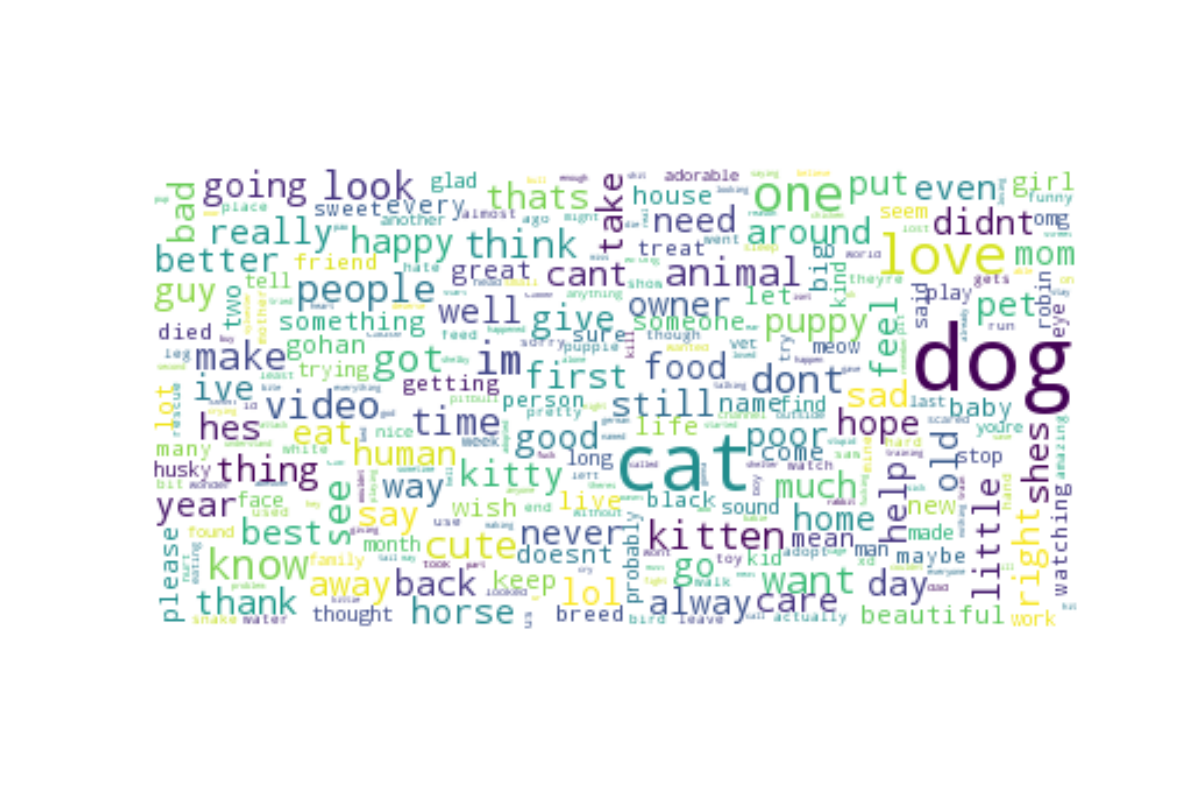

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "".join([(k + " ")*v for k,v in wc])

wcloud = WordCloud(background_color = "white", max_words = 10000, collocations = False,
               contour_width = 3, contour_color='steelblue', max_font_size = 40)

# Generate a word cloud image
wcloud.generate(text)

# Display the generated image:
# the matplotlib way:
fig,ax0=plt.subplots(nrows=1,figsize=(12,8))
ax0.imshow(wcloud,interpolation='bilinear')

ax0.axis("off")
display(fig)

####Identify Creators With Cat And Dog Owners In The Audience

In [34]:
from pyspark.sql.functions import countDistinct
tmp = best_model_pred.filter("prediction = 1.0")
creators = tmp.groupBy('creator_name').agg(countDistinct('userid')).sort('count(DISTINCT userid)',ascending= False)
#creators.show(20)

+--------------------+----------------------+
 creator_name|count(DISTINCT userid)|
+--------------------+----------------------+
 The Dodo| 33601|
 Brave Wilderness| 18324|
 Robin Seplut| 17697|
Hope For Paws - O...| 17468|
 Taylor Nicole Dean| 16254|
 Gohan The Husky| 15568|
 Vet Ranch| 12013|
 Cole & Marmalade| 10886|
 Talking Kitty Cat| 9734|
 Brian Barczyk| 8828|
Gone to the Snow ...| 8619|
 Paws Channel| 6979|
 stacyvlogs| 6639|
 ViralHog| 6533|
 Viktor Larkhill| 6368|
Zak Georges Dog T...| 5334|
 meow meow| 4848|
 The Pet Collective| 4153|
 ViralBe| 4139|
 SlideShow ForFun| 3304|
+--------------------+----------------------+
only showing top 20 rows

In [35]:
creators.head(20)

Out[ 60 ]: 
[Row(creator_name='The Dodo', count(DISTINCT userid)=33601),
 Row(creator_name='Brave Wilderness', count(DISTINCT userid)=18324),
 Row(creator_name='Robin Seplut', count(DISTINCT userid)=17697),
 Row(creator_name='Hope For Paws - Official Rescue Channel', count(DISTINCT userid)=17468),
 Row(creator_name='Taylor Nicole Dean', count(DISTINCT userid)=16254),
 Row(creator_name='Gohan The Husky', count(DISTINCT userid)=15568),
 Row(creator_name='Vet Ranch', count(DISTINCT userid)=12013),
 Row(creator_name='Cole & Marmalade', count(DISTINCT userid)=10886),
 Row(creator_name='Talking Kitty Cat', count(DISTINCT userid)=9734),
 Row(creator_name='Brian Barczyk', count(DISTINCT userid)=8828),
 Row(creator_name='Gone to the Snow Dogs', count(DISTINCT userid)=8619),
 Row(creator_name='Paws Channel', count(DISTINCT userid)=6979),
 Row(creator_name='stacyvlogs', count(DISTINCT userid)=6639),
 Row(creator_name='ViralHog', count(DISTINCT userid)=6533),
 Row(creator_name='Viktor Larkhill', count(DISTINCT userid)=6368),
 Row(creator_name='Zak Georges Dog Training rEvolution', count(DISTINCT userid)=5334),
 Row(creator_name='meow meow', count(DISTINCT userid)=4848),
 Row(creator_name='The Pet Collective', count(DISTINCT userid)=4153),
 Row(creator_name='ViralBe', count(DISTINCT userid)=4139),
 Row(creator_name='SlideShow ForFun', count(DISTINCT userid)=3304)]

####Analysis and Future work

###From project to CV format 
####1. overview of project 
####2. data clean and modeling 
####3. data analysis 
####4. build ml model
####5. recommendation based on the model results